# Regression and Other Stories: Pearson and Lee Heights

The heredity of height. Published in 1903 by Karl Pearson and Alice Lee. See Chapter 6 in Regression and Other Stories.

-----

### Load packages

In [1]:
using DataFrames, StatsPlots, CSV, HTTP, Random
using Distributions, Turing, MCMCChains

### Load data

In [2]:
data = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/PearsonLee/data/Heights.txt"
heights = CSV.File(HTTP.get(data).body, delim=" ") |> DataFrame
n = size(heights)[1]
first(heights, 6)

,daughter_height,mother_height
,Float64,Float64
1,52.5,59.5
2,52.5,59.5
3,53.5,59.5
4,53.5,59.5
5,55.5,59.5
6,55.5,59.5


### Linear regression

In [3]:
@model function m1(h_m, h_d)
    σ ~ Exponential(3)
    α ~ Normal(0, 100)
    β ~ Normal(0, 10)
    μ = α .+ β * h_m
    h_d ~ MvNormal(μ, σ)
end;

In [4]:
model1 = m1(heights.mother_height, heights.daughter_height)
fit1 = sample(model1, NUTS(), 4000)
summarystats(fit1)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\tburch\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           α   29.8058    0.7923     0.0125    0.0197   1306.4612    1.0026    ⋯
           β    0.5448    0.0127     0.0002    0.0003   1299.7603    1.0026    ⋯
           σ    2.2623    0.0210     0.0003    0.0004   1818.7495    1.0011    ⋯
                                                                1 column omitted


In [5]:
coefs = get(fit1, [:α, :β])

a_hat = coefs.α.data
b_hat = coefs.β.data;

### Plot mothers' and daughters' heights

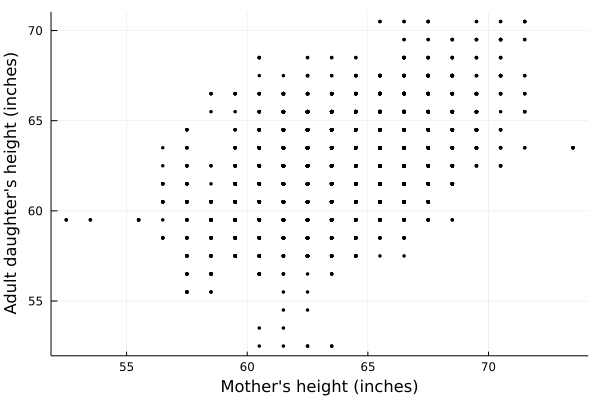

In [6]:
scatter(
    heights.daughter_height, 
    heights.mother_height,
    legend=false,
    xlabel="Mother's height (inches)",
    ylabel="Adult daughter's height (inches)",
    color=:black,
    markersize=2
)

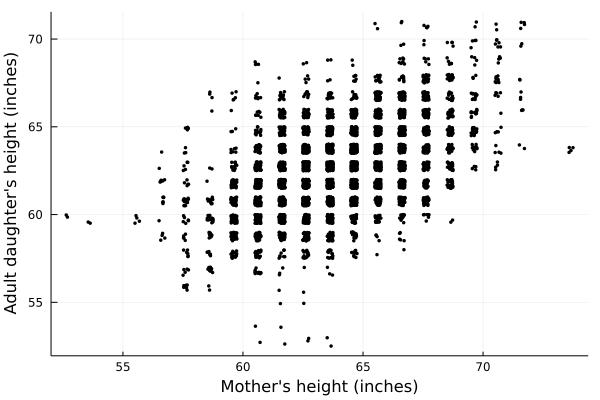

In [7]:
scatter(
    heights.daughter_height .+ 0.25 .*rand.(), 
    heights.mother_height .+ 0.5.* rand.(),
    legend=false,
    xlabel="Mother's height (inches)",
    ylabel="Adult daughter's height (inches)",
    color=:black,
    markersize=2
)

### Plot mothers' and daughters' heights and fitted regression line

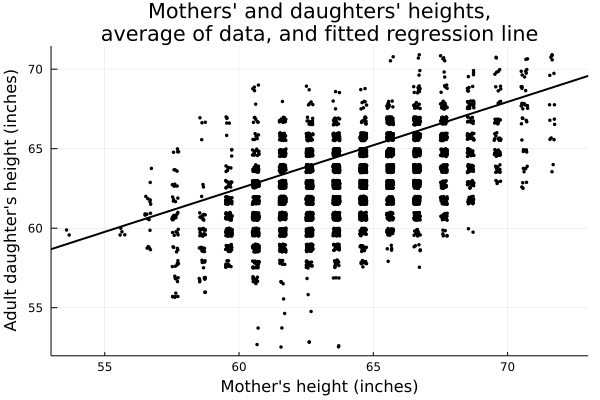

In [8]:
scatter(
    heights.daughter_height .+ 0.25 .*rand.(), 
    heights.mother_height .+ 0.5.* rand.(),
    legend=false,
    xlabel="Mother's height (inches)",
    ylabel="Adult daughter's height (inches)",
    title="Mothers' and daughters' heights,\naverage of data, and fitted regression line",
    color=:black,
    markersize=2,
    xlim=(53,73)
)
plot!(
    53:73,
    x -> mean(a_hat) .+ mean(b_hat) .* x,
    color=:black,
    linewidth=2
)

### Plot fitted regression line and the average of the data

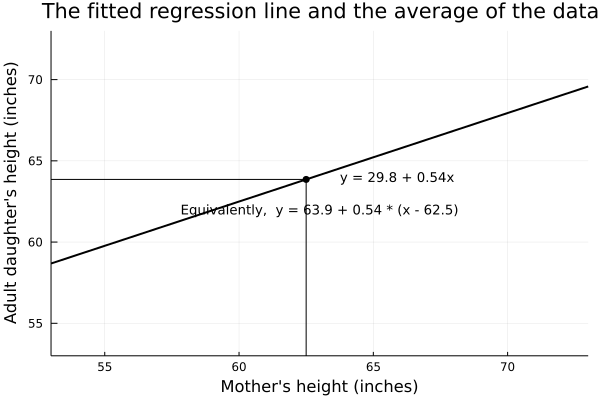

In [9]:
plot(
    53:73,
    x -> mean(a_hat) .+ mean(b_hat) .* x,
    color=:black,
    linewidth=2,
    xlim=(53,73),
    ylim=(53,73),
    xlabel="Mother's height (inches)",
    ylabel="Adult daughter's height (inches)",
    title="The fitted regression line and the average of the data",
    legend=false
)
scatter!(
    [mean(heights.mother_height)], [mean(heights.daughter_height)],
    color=:black
)
plot!(
    0:0.1:mean(heights.mother_height),
    x->mean(heights.daughter_height),
    color=:black
)
plot!(
    fill(mean(heights.mother_height),1000),
    range(0, mean(heights.daughter_height),length=1000),
    color=:black
)
annotate!(68,64,
    text(string("y = ", round(mean(a_hat), digits=1), " + ", round(mean(b_hat), digits=2), "x"), 9,:right),
)
annotate!(63,62,
    text(
        string(
            "Equivalently,  y = ", round(mean(heights.daughter_height), digits=1), " + ", 
            round(mean(b_hat), digits=2), " * (x - ", round(mean(heights.mother_height), digits=1), ")"
        ), 9)
)

### Plot fitted regression line

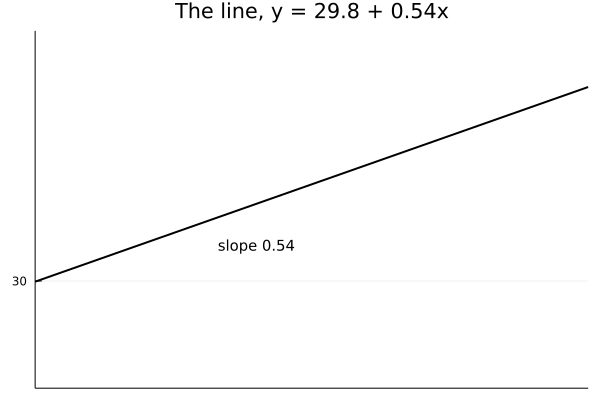

In [10]:
plot(
    0:100,
    x -> mean(a_hat) .+ mean(b_hat) .* x,
    color=:black,
    linewidth=2,
    xlabel="",
    ylabel="",
    title=string("The line, y = ", round(mean(a_hat), digits=1), " + ", round(mean(b_hat), digits=2), "x"),
    legend=false,
    xlim=(0,100),
    ylim=(0,100),
    xticks=false,
    yticks=[30]
)

annotate!(
    40,40,
    text("slope $(round(mean(b_hat),digits=2))", 10)
)

### Plot data and fitted regression line in the context of the data

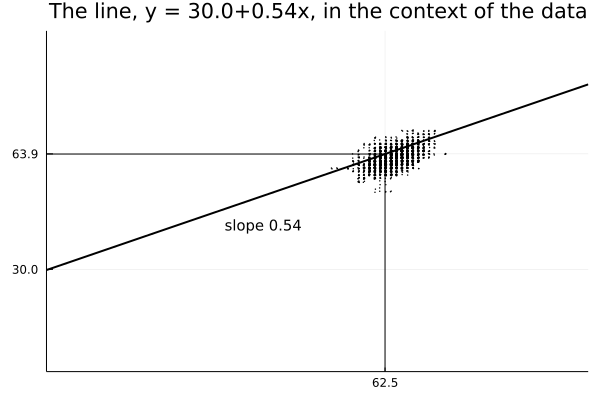

In [11]:
# Plot regression line
plot(
    0:100,
    x -> mean(a_hat) .+ mean(b_hat) .* x,
    color=:black,
    linewidth=2,
    xlabel="",
    ylabel="",
    title=string("The line, y = ", round(mean(a_hat), digits=1), " + ", round(mean(b_hat), digits=2), "x"),
    legend=false,
    xlim=(0,100),
    ylim=(0,100),
    xticks=[round(mean(heights.mother_height),digits=1)],
    yticks=[30, round(mean(heights.daughter_height),digits=1)]
)
# add data
scatter!(
    heights.daughter_height .+ 0.25 .*rand.(), 
    heights.mother_height .+ 0.5.* rand.(),
    legend=false,
    title=string("The line, y = ", round(mean(a_hat)) , "+", round(mean(b_hat),digits=2),"x, in the context of the data"),
    titlesize=8,
    color=:black,
    markersize=1,
)
# Add indication to mean
plot!(
    0:0.1:mean(heights.mother_height),
    x->mean(heights.daughter_height),
    color=:black
)
plot!(
    fill(mean(heights.mother_height),1000),
    range(0, mean(heights.daughter_height),length=1000),
    color=:black
)
# add slope annotation
annotate!(
    40,43,
    text("slope $(round(mean(b_hat),digits=2))", 10)
)